## Aproksymacja funkcji

Pod pojęciem aproksymacji rozumie się przybliżanie jednej funkcji (tzw. funkcji aproksymowanej) z użyciem innej - aproksymującej. Przykłady matematycznego aparatu służącego do aproksymacji funkcji pojawiły się na przedmiotach związanych z metodami numerycznymi (aproksymacja w bazie wielomianów, funkcji trygonometrycznych, funkcjami sklejanymi,  Padego itp.).

Przypomnienie: żeby stwierdzić poprawność aproksymacji, potrzebujemy funkcji błędu, zwanej *błędem aproksymacji* i chcemy znaleźć taką funkcję *G(x)* służącą do aproksymacji *F(x)*, żeby $||G(x) - F(x)||$ było jak najmniejsze. Na potrzeby tych laboratoriów będziemy posługiwać się *błędem aproksymacji średniokwadratowej*:

$L = \int_a^b[G(x)-F(x)]^2 dx$

Możemy przybliżyć całkowanie jako sumę, bo i tak będziemy wykonywać badania dla skończonej liczby węzłów $N$:

$L = \sum_{i=1}^{N}(G_i-F_i)^2$

### Po co aproksymujemy?

Bardzo wiele zjawisk jest opisanych jakąś funkcją, o której prawdziwej postaci nie mamy pojęcia i często może ona być zbyt skomplikowana, żeby dało się ją w ogóle spróbować zapisać wprost. Takimi funkcjami może być np:

* wartość nieruchomości
* cena akcji
* ilość kliknięć klientów w aplikację
* budżet miasta
* temperatura powietrza (przewidywanie pogody)

### Czemu używamy sieci neuronowych w aproksymacji?

Aproksymacja za pomocą znanych państwu metod (np. aproksymacja w bazie funkcji trygonometrycznych) wymaga odpowiednio skomplikowanego aparatu matematycznego i najczęściej wymaga jakiejś wiedzy na temat aproksymowanej funkcji. Sieci neuronowe pozwalają dokonać aproksymacji w prostszy sposób, również w bardzo dużej liczbie wymiarów i przy bardzo skomplikowanych funkcjach.

### Dzisiejsze zajęcia

Aproksymacja danych doświadczalnych krzywymi nosi często miano nazwę **regresji**. Stąd też sieci przeznaczone do zadań regresji będą tworzone za pomocą klasy MLPRegressor.

Jeśli błąd będzie mierzony na dyskretnym zbiorze punktów   to jest to *aproksymacja punktowa*, a jeśli w przedziale  to jest to aproksymacja integralna lub przedziałowa (przypadek rzadziej spotykany).

## Przykład aproksymacji w jednym wymiarze

Na początku zobaczmy, jak sieć feed-forward poradzi sobie z aproksymacją funkcji $f(x) = 3.1sin(1.7x)+0.8cos(3.3x+2.6)+0.5cos(2.2x+0.4)+sin(6x)$

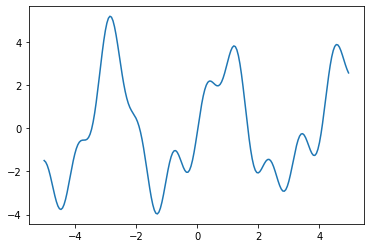

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# stwórzmy przykładową funkcję i sprawdźmy, jak poradzi sobie z nią sieć neuronowa
x = np.arange(-5,5,0.05)
y = 3.1*np.sin(1.7*x)+0.8*np.cos(3.3*x+2.6)+0.5*np.cos(2.2*x+0.4)+np.sin(6.*x)
# narysujmy tę funkcję:
plt.plot(x,y)

In [ ]:
# spróbujmy stworzyć sieć neuronową do aproksymacji tej funkcji:

# dzielimy zbiór punktów na uczące i testujące:
# musimy zrobić reshape, bo dane uczące muszą być 2-wymiarowym arrayem, nawet, jeśli jeden z tych wymiarów to 1
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1),y)

network = MLPRegressor(solver='adam',hidden_layer_sizes=(80, 80, 80, 80, 80), max_iter = 1000, tol = 0.001, activation = 'relu')

network.fit(X_train, y_train)

# uwaga, ten score to już nie jest accuracy!
network.score(X_train, y_train)

0.9495989958004043

In [ ]:
network.score(X_test, y_test)

0.9487060018818577

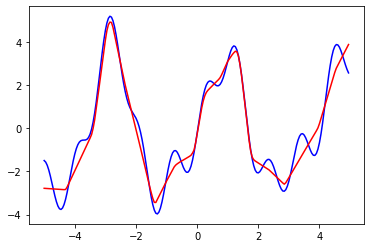

In [ ]:
# Zobaczmy jak wygląda wykres aproksymowanej funkcji i aproksymującej

y_pred = network.predict(x.reshape(-1,1))

plt.plot(x,y,'b')
plt.plot(x,y_pred,'r')
plt.show()
# widzimy, że przewidywana funkcja jest całkiem niezłym przybliżeniem tej, o którą nam chodzi

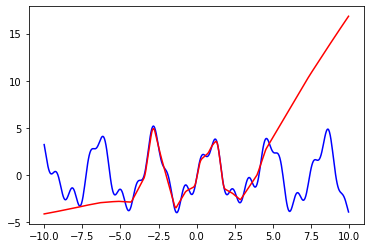

In [ ]:
# Zobaczmy co się stanie poza obszarem, który podaliśmy sieci do nauczenia
x_extended = np.arange(-10,10,0.05)
y_extended = 3.1*np.sin(1.7*x_extended)+0.8*np.cos(3.3*x_extended+2.6)+0.5*np.cos(2.2*x_extended+0.4)+np.sin(6.*x_extended)
y_predicted_extended = network.predict(x_extended.reshape(-1,1))

plt.plot(x_extended,y_extended,'b')
plt.plot(x_extended,y_predicted_extended,'r')
plt.show()
# och... co tu poszło nie tak?

Czy problem, który obserwujemy, dotyczy tylko aproksymacji przy użyciu sieci neuronowych?

## Aproksymacja na podstawie punktów

Teraz przybliżmy przykład, w którym znamy pojedyncze punkty i chcemy dopasować do nich funkcję.

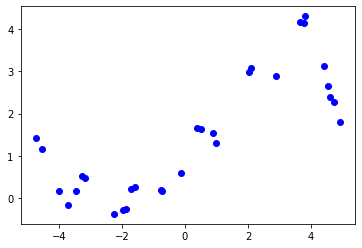

In [ ]:
# punkty nie są rozłożone równomiernie i nie znamy "prawdziwej" funkcji, która za nimi stoi
X2 = np.array([-4.73, -4.52, -4., -3.7, -3.45, -3.26, -3.17, -2.24, -1.98, -1.86, -1.7, -1.59, -0.75, -0.73, -0.12, 0.38, 
              0.5, 0.88, 0.98, 2.03, 2.08, 2.88, 3.66, 3.78, 3.82, 4.4, 4.55, 4.61, 4.72, 4.92])
Y2 = np.array([1.42, 1.16, 0.18, -0.16, 0.16, 0.52, 0.47, -0.37, -0.27, -0.25, 0.23, 0.27, 0.2, 0.18, 0.6, 1.66, 1.63, 
              1.53, 1.3, 2.98,3.08,  2.89,  4.17,  4.15,  4.3, 3.12, 2.66, 2.39, 2.27, 1.8 ])

# zobaczmy sobie, jak wyglądają:
plt.plot(X2,Y2, "bo")

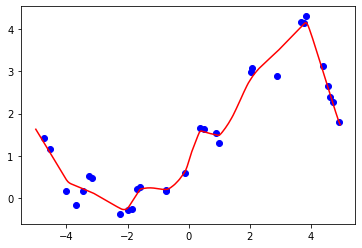

In [ ]:
# stwórzmy sieć, która ma za zadanie dokonać aproksymacji:
network2 = MLPRegressor(solver='adam',hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter = 5000, tol = 0.001, activation = 'relu')
network2.fit(X2.reshape(-1,1), Y2)
X2_space = np.arange(-5., 5., 0.05)
Y2_predicted = network2.predict(X2_space.reshape(-1,1))

# zobaczmy, jak wygląda funkcja aproksymująca:
plt.plot(X2,Y2, "bo")
plt.plot(X2_space, Y2_predicted, "r")
plt.show()

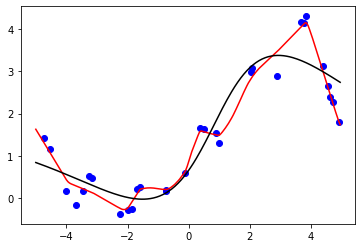

In [ ]:
# co by się stało, gdybyśmy spróbowali innej funkcji aktywacji?
network3 = MLPRegressor(solver='adam',hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter = 5000, tol = 0.001, activation = 'tanh')
network3.fit(X2.reshape(-1,1), Y2)
Y3_predicted = network3.predict(X2_space.reshape(-1,1))

# wyrysujmy to, otrzymaliśmy z obu sieci, na jednym wykresie
plt.plot(X2,Y2, "bo")
plt.plot(X2_space, Y2_predicted, "r")
plt.plot(X2_space, Y3_predicted, "k")
plt.show()

### Jak oceniamy poprawność dopasowania?

Wiemy, że do określenia jakości dopasowania używamy błędu średniokwadratowego.

Wywołanie metody score( ) dla MLPRegressor używa tzw. **współczynnika determinacji $R^2$**, który liczymy w następujący sposób:

$1 - \frac{\Sigma_i^N (y^i_{true}-y^i_{predicted})^2}{\Sigma_i^N (y^i_{true}-y_{mean})^2}$

Dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score

Najlepszy wynik osiągnięty przy używaniu współczynnika determinacji to 1, kiedy wszystkie badane punkty leżą na funkcji, jednak musimy pamiętać o tym, że nie zawsze chcemy dojść do takiej sytuacji kosztem tego, co dzieje się pomiędzy punktami (dlatego weryfikacja dla zbioru testującego jest taka ważna!)

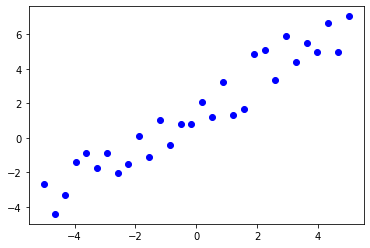

In [ ]:
# stwórzmy zaszumione dane:
X_noise = np.linspace(-5.,5.,30)
Y_noise = X_noise + 3*np.random.rand(30)
plt.plot(X_noise, Y_noise, "bo")

Network 1 score : 0.915644
Network 2 score : 0.957478


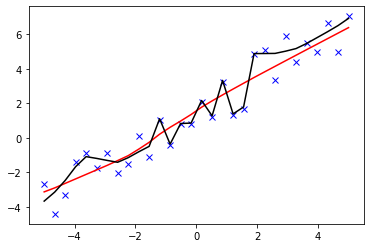

In [ ]:
# stwórzmy dwie sieci: jedną prostszą, drugą bardziej skomplikowaną
network_noise1 = MLPRegressor(solver='adam',hidden_layer_sizes=(20,20), max_iter = 1000, tol = 0.001, activation = 'relu')
network_noise1.fit(X_noise.reshape(-1,1), Y_noise)

network_noise2 = MLPRegressor(solver='adam',hidden_layer_sizes=(2000,2000,2000,2000,2000), max_iter = 1000, tol = 0.001, activation = 'relu')
network_noise2.fit(X_noise.reshape(-1,1), Y_noise)

# dokonajmy predykcji, żeby móc później narysować sieci
predict_noise1 = network_noise1.predict(X_noise.reshape(-1,1))
predict_noise2 = network_noise2.predict(X_noise.reshape(-1,1))

# wypiszmy R^2 predykcji obu sieci:
print("Network 1 score : %f\nNetwork 2 score : %f" % (network_noise1.score(X_noise.reshape(-1,1), Y_noise), network_noise2.score(X_noise.reshape(-1,1), Y_noise)))

# narysujmy obie sieci na jednym wykresie razem z punktami:
plt.plot(X_noise,Y_noise,"bx")
plt.plot(X_noise,predict_noise1,"r")
plt.plot(X_noise,predict_noise2,"k")

Sieć 2 otrzymała (oczywiście) lepszy wynik $R^2$, jednak pytanie, czy nie dlatego, bo dopasowała się do losowych szumów obecnych w w danych. Kolejne pytanie: czy stosunkowo niewielka poprawa dopasowania była warta robienia setki razy większej sieci (nie zawsze mamy odpowiednio duże zasoby obliczeniowe dla dużych sieci)?

## Zadania do samodzielnego wykonania

1.

Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, radiową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję $Z(w_{TV}, w_{radio}, w_{prasa})$. Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące.

2.

Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji $f(x) = sin(x)$ w przedziale $[-2\pi,2\pi]$. Proszę użyć $tanh$ jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

3.

Proszę pobrać zbiór california housing (można go załadować w sklearnie dzięki funkcji fetch_california_housing( ), jest też dostępny w colabie jako przykładowy plik testowy). Zawiera nieznormalizowane dane dotyczące bloków mieszkalnych w Kaliforni zebranych w 1990 roku, takie jak lokacja geograficzna, wiek, całkowita liczba mieszkańców bloku, znajdujących się w nim mieszkań i sypialni, oraz mediana dochodów tych mieszkańców. W ostatniej kolumnie znajduje się mediana wartości mieszkania w tym bloku. Proszę znormalizować dane, a następnie zaproponować kilka wielowarstowych sieci neuronowych i ocenić jak dobrze dokonają aproksymacji funkcji mediany wartości mieszkań za pomocą opisanych dzisiaj metryk. Proszę spróbować osiągnąć jak najlepszy wynik (jak najwyższe $R^2$). Wyniki oczywiście proszę sprawdzać na danych testujących.

4.

Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz uzyskanych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

5.

Proszę sprawdzić wyniki regresji dla zbioru california housing dla różnych podziałów na dane uczące i testujące (dla co najmniej pięciu podziałów 20-80, 35-65, 50-50, 65-35, 80-20) i wyciągnąć wnioski.

___________________________________
## Zadania dla chętnych

6*.

Można spróbować (już po normalizacji) zmniejszyć wymiarowość zbioru california housing. Żeby to osiągnąć, opcją jest np. odrzucić pierwsze dwie kolumny, albo dokonać zmniejszenia wymiarowości powszechnie używanym algorytmem PCA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, w dokumentacji są przykłady użycia). Wtedy można zbadać jak zmieni się działanie sieci po takim zabiegu.


___________________________________

## Materiały:

Dokumentacja:

* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

* https://developers.google.com/machine-learning/crash-course/california-housing-data-description?hl=pl


Zad 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


drive.mount('/content/drive')
url = '/content/drive/MyDrive/Colab Notebooks/Data_MIO/Advertising.csv'
data = pd.read_csv(url)
y = data["Sales"]
X = data.drop(["Sales"], axis=1)
X = X.drop(X.columns[0], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


network_1 = MLPRegressor(solver='adam',hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter = 1000, tol = 0.001, activation = 'relu')
network_1.fit(X_train, y_train)

network_8 = MLPRegressor(solver='adam',hidden_layer_sizes=(80, 80, 80, 80, 80), max_iter = 1000, tol = 0.001, activation = 'relu')
network_8.fit(X_train, y_train)

print("Dla danych trenujących:")
print(f"Sieć 10x10x10x10x10: {network_1.score(X_train, y_train)}")
print(f"Sieć 80x80x80x80x80: {network_8.score(X_train, y_train)}\n")

print("Dla danych testowych:")
print(f"Sieć 10x10x10x10x10: {network_1.score(X_test, y_test)}")
print(f"Sieć 80x80x80x80x80: {network_8.score(X_test, y_test)}\n\n")


network_r = MLPRegressor(solver='adam',hidden_layer_sizes=(80, 80, 80, 80, 80), max_iter = 1000, tol = 0.001, activation = 'relu')
network_r.fit(X_train, y_train)

network_t = MLPRegressor(solver='adam',hidden_layer_sizes=(80, 80, 80, 80, 80), max_iter = 1000, tol = 0.001, activation = 'tanh')
network_t.fit(X_train, y_train)

print("Dla danych trenujących:")
print(f"Sieć relu: {network_r.score(X_train, y_train)}")
print(f"Sieć tanh: {network_t.score(X_train, y_train)}\n")

print("Dla danych testowych:")
print(f"Sieć relu: {network_r.score(X_test, y_test)}")
print(f"Sieć tanh: {network_t.score(X_test, y_test)}\n\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dla danych trenujących:
Sieć 10x10x10x10x10: 0.47475386567055944
Sieć 80x80x80x80x80: 0.9825574511606332

Dla danych testowych:
Sieć 10x10x10x10x10: 0.6869022646970977
Sieć 80x80x80x80x80: 0.9762436247638403


Dla danych trenujących:
Sieć relu: 0.9554768608260329
Sieć tanh: 0.979592601752442

Dla danych testowych:
Sieć relu: 0.956540639812405
Sieć tanh: 0.9107599679585276




Zad 2

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 1.11904614  0.56391038  2.66274936 -0.31835955 -3.59964414 -2.04754079
  2.56709186 -2.99336051  0.6903878   1.93913456]
f(x) = [-0.99201846] + sum(i=1 to 10)[[[ 0.4205568 ]
 [ 0.1603703 ]
 [ 1.85036289]
 [ 0.70685408]
 [ 0.5085165 ]
 [ 1.0643017 ]
 [ 0.80607244]
 [ 0.82652891]
 [-0.47234749]
 [ 0.81749176]] * tanh([[ 1.33875772 -0.72649036  0.4613082   1.07809808  1.84933868 -0.67131504
  -1.00698373 -0.82788621 -1.01983959 -0.89424461]] * x + [ 1.11904614  0.56391038  2.66274936 -0.31835955 -3.59964414 -2.04754079
  2.56709186 -2.99336051  0.6903878   1.93913456])


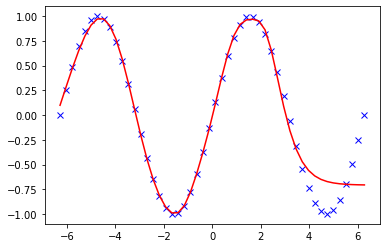

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from sklearn.neural_network import MLPRegressor

X = np.linspace(-2*pi, 2*pi)
X = X.reshape(-1, 1)
Y = np.sin(X)

plt.plot(X, Y, "bx")

network = MLPRegressor(solver='adam', hidden_layer_sizes=(10), max_iter = 10000, tol = 0.000001, activation = 'tanh')
network.fit(X, Y)

y = network.predict(X)

plt.plot(X, y, "r")

eq = str(network.intercepts_[1])

print(network.intercepts_[0])

# for i in range(10):
#   eq += "+ " + str(network.coefs_[1][i]) + " * tanh(" + str(network.coefs_[0][i]) + " * x + " + str(network.intercepts_[0][i])
# print(eq)

print(f"f(x) = {network.intercepts_[1]} + sum(i=1 to 10)[{network.coefs_[1]} * tanh({network.coefs_[0]} * x + {network.intercepts_[0]})]")

Zad 3

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import random

sc = StandardScaler()
train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")
train_data = sc.fit_transform(train_data)
X_train = [entry[:8] for entry in train_data]
y_train = [entry[-1] for entry in train_data]

test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")
test_data = sc.transform(test_data)
X_test = [entry[:8] for entry in test_data]
y_test = [entry[-1] for entry in test_data]


# tuples = []
# for i in range(5):
#   length = random.randint(1, 10)
#   t = tuple(random.randint(1, 100) for j in range(length))
#   tuples.append(t)
# print(tuples)

layers =[(33, 42, 76, 25, 14, 81), (52, 4, 49, 19, 20, 99, 35, 74, 76), (71, 90, 71, 61, 93, 64), (45, 50, 66), (27, 9, 16, 19, 39, 23, 29, 65)]
for layer in layers:
  network = MLPRegressor(solver='adam',hidden_layer_sizes=layer, max_iter = 1000, tol = 0.001, activation = 'relu')
  network.fit(X_train, y_train)
  print(f"Sieć o architekturze {layer} osiągnęła R^2 {network.score(X_test, y_test)}")

Sieć o architekturze (33, 42, 76, 25, 14, 81) osiągnęła R^2 0.7510390330768961
Sieć o architekturze (52, 4, 49, 19, 20, 99, 35, 74, 76) osiągnęła R^2 0.7597411695911286
Sieć o architekturze (71, 90, 71, 61, 93, 64) osiągnęła R^2 0.7549086227896087
Sieć o architekturze (45, 50, 66) osiągnęła R^2 0.7670349293131353
Sieć o architekturze (27, 9, 16, 19, 39, 23, 29, 65) osiągnęła R^2 0.7478238446048786


Zad 4

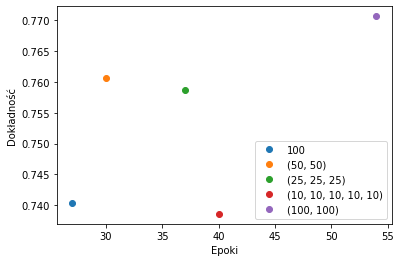

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

sc = StandardScaler()
train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")
train_data = sc.fit_transform(train_data)
X_train = [entry[:8] for entry in train_data]
y_train = [entry[-1] for entry in train_data]

test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")
test_data = sc.transform(test_data)
X_test = [entry[:8] for entry in test_data]
y_test = [entry[-1] for entry in test_data]

hidden_layers = [(100), (50, 50), (25, 25, 25), (10, 10, 10, 10, 10), (100, 100)]

results = []
for layer in hidden_layers:
    network = MLPRegressor(solver='adam',hidden_layer_sizes=layer, max_iter = 1000, tol = 0.001, activation = 'relu')
    network.fit(X_train, y_train)
    accuracy = network.score(X_test, y_test)
    epochs = network.n_iter_
    results.append((layer, accuracy, epochs))

fig, ax = plt.subplots()
for hidden_layers, accuracy, epochs in results:
    ax.plot(epochs, accuracy, 'o', label=f'{hidden_layers}')

ax.set_xlabel('Epoki')
ax.set_ylabel('Dokładność')
ax.legend(loc='best')
plt.show()

W ogólności sieci neuronowe z większą liczbą neuronów tworzą bardziej skomplikowane modele, które są również bardziej podatne na overfitting. Większa złożoność modeli przekłada się na zwiększenie liczby epok potrrzebnych na znalezienie minimum funkcji błędu. Losowość rozmieszczenia punktów na wykresie wynika z tego, że sieci startują z losowymi wagami wejsciowymi, co sprawia, że za każdym razem potrzebują innej ilości epok i otrzymują inną dokładność

Zad 5

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing.data
y = housing.target

test_sizes = [0.2, 0.35, 0.5, 0.65, 0.8]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    network = MLPRegressor(solver='adam',hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter = 1000, tol = 0.001, activation = 'relu')
    network.fit(X_train, y_train)
    r2 = network.score(X_test, y_test)
    
    print(f"Test size: {test_size:.2f}")
    print(f"R²: {r2:.2f}")
    print("-----------------------")

Test size: 0.20
R²: 0.58
-----------------------
Test size: 0.35
R²: 0.52
-----------------------
Test size: 0.50
R²: 0.48
-----------------------
Test size: 0.65
R²: 0.39
-----------------------
Test size: 0.80
R²: 0.01
-----------------------


Na podstawie przeprowadzonych testów można zauważyć, że różne podziały na zbiory uczący i testowy znacząco wpływają na wyniki regresji. W przypadku zbioru California Housing najlepsze wyniki osiągane były dla podziału 80-20 oraz 65-35, co oznacza, że najskuteczniejsze jest wykorzystanie większej ilości danych do uczenia modelu. Warto też zauważyć, że w przypadku podziału 20-80 otrzymujemy model, który praktycznie nie potrafi wygenerować zadowalającej funkcji apoksymacyjnej.